In [131]:
# Import dependencies
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
# Import data and creat DataFrame

file_path = 'Resources/fastfood.csv'
fast_food_df = pd.read_csv(file_path)

fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
# CLEAN DATA
# Update the 'salad' column to True if the substring 'salad' exists in the 'item' column
fast_food_df['salad'] = fast_food_df['item'].str.contains("salad", case=False)
# Drop kids menu items - dropped 4 items
kids_index = fast_food_df[fast_food_df['item'].str.contains("kids", case=False)].index
fast_food_df = fast_food_df.drop(kids_index)
# Drop 'vit_a', 'vit_c', 'calcium' columns
fast_food_df = fast_food_df[['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'salad']]
fast_food_df = fast_food_df.reset_index(drop=True)
fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False


Suggested Daily Intake Averages for Females and Males

In [53]:
#suggested daily intake averages for females and males
average_intake_df = pd.DataFrame({'sex': ['female','male'],
                                  'calories': [1800, 2267],
                                  'total_fat': [46, 56],
                                  'sat_fat': [180, 227],
                                  'cholesterol': [200, 200],
                                  'sodium': [2300, 2300],
                                  'total_carb': [130, 130],
                                  'fiber': [25.2, 30.8],
                                  'sugar': [24, 36],
                                  'protein': [46, 56]})

average_intake_df 

# Set new index to sex
average_intake_df = average_intake_df .set_index("sex")
average_intake_df.head()

,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
sex,,,,,,,,,
female,1800,46,180,200,2300,130,25.2,24,46
male,2267,56,227,200,2300,130,30.8,36,56


Suggested Daily Intake Average of Calories for Females 18+

In [58]:
# Get the data contained within the "female" row and the "calories" column
avg_female_cal = average_intake_df.loc["female","calories"]
print(avg_female_cal)

1800


Suggest Daily Intake Per Meal Averages for Females and Males

In [156]:
#suggested daily intake average for female and males per meal
average_meal_cal = average_intake_df['calories']/3
average_meal_fat = average_intake_df['total_fat']/3
average_meal_chol = average_intake_df['cholesterol']/3
average_meal_sod = average_intake_df['sodium']/3
average_meal_carb = average_intake_df['total_carb']/3
average_meal_fib = average_intake_df['fiber']/3
average_meal_sug = average_intake_df['sugar']/3
average_meal_prot = average_intake_df['protein']/3

#seperate calories by male and female
female_average_meal_cal = average_meal_cal.loc["female"]
male_average_meal_cal = average_meal_cal.loc["male"]

print(female_average_meal_cal)
print(male_average_meal_cal)

600.0
755.6666666666666


Create a Copy of the Original Dataset 

In [6]:
fast_food_bin_df = fast_food_df


Creating a New Variable Using Bins for Calorie Ranges Per Item

In [7]:
# Create bins in which to place values based upon total calories per item
bins = [0, 249, 499, 749, 999, 1249, 1499, 1749, 1999, 2249, 2499]

# # Create labels for these bins
group_labels = ["0 to 249", "250 to 499", "500 to 749", "750 to 999", "1000 to 1249", "1250 to 1499",
                "1500 to 1749", "1750 to 1999", "2000 to 2249", "2250 to 2499"]

In [8]:
#creating calorie bins by groups of 250 calories
pd.cut(fast_food_bin_df["calories"], bins, labels=group_labels)

0        250 to 499
1        750 to 999
2      1000 to 1249
3        750 to 999
4        750 to 999
           ...     
506      750 to 999
507      500 to 749
508      750 to 999
509      500 to 749
510      500 to 749
Name: calories, Length: 511, dtype: category
Categories (10, object): ['0 to 249' < '250 to 499' < '500 to 749' < '750 to 999' ... '1500 to 1749' < '1750 to 1999' < '2000 to 2249' < '2250 to 2499']

Create a Count for the Number of Items Per Calorie Range as Well as Averages for Calories, Fat, Cholesterol, Sodium, Carbs, and Protein

In [151]:
fast_food_bin_df["calorie ranges"] = pd.cut(fast_food_bin_df["calories"], bins, labels=group_labels, include_lowest=True)
fast_food_bin_df.head()

# Create a GroupBy object based upon calorie ranges
calorie_groups = fast_food_bin_df.groupby('calorie ranges')


# Find how many rows fall into each bin
print(calorie_groups["calorie ranges"].count())

# Get the average of each of the first 5 rating columns within the GroupBy object
calorie_groups[["item", "calories", "total_fat", "cholesterol", "sodium", "total_carb", "protein"]].mean()

calorie ranges
0 to 249         64
250 to 499      196
500 to 749      160
750 to 999       59
1000 to 1249     23
1250 to 1499      4
1500 to 1749      3
1750 to 1999      1
2000 to 2249      0
2250 to 2499      1
Name: calorie ranges, dtype: int64


,calories,total_fat,cholesterol,sodium,total_carb,protein
calorie ranges,,,,,,
0 to 249,174.531250,9.093750,33.203125,538.593750,14.312500,13.234375
250 to 499,374.387755,17.224490,44.642857,920.102041,35.663265,19.535714
500 to 749,617.312500,30.356250,79.968750,1451.625000,54.900000,31.387500
750 to 999,848.813559,42.762712,108.559322,1886.949153,73.288136,42.728814
1000 to 1249,1100.434783,64.260870,185.217391,2312.608696,70.956522,56.727273
1250 to 1499,1285.000000,85.000000,200.000000,2395.000000,75.750000,49.750000
1500 to 1749,1553.333333,93.333333,455.000000,3346.666667,80.333333,115.333333
1750 to 1999,1770.000000,107.000000,295.000000,3370.000000,105.000000,98.000000
2000 to 2249,NaN,NaN,NaN,NaN,NaN,NaN


Create a New Variable to Determine if an Item is Under/Over Suggested Calories per Meal

In [138]:
#add a column for if item is over suggested cal meal intake for women
mask = fast_food_bin_df['calories']>female_average_meal_cal

fast_food_bin_df['Over Suggested Meal Calorie Intake for Females'] = mask
fast_food_bin_df.head()

over_under_cal_female = fast_food_bin_df.loc[:,"Over Suggested Meal Calorie Intake for Females"]
print(over_under_cal_female)


0      False
1       True
2       True
3       True
4       True
       ...  
506     True
507    False
508     True
509     True
510     True
Name: Over Suggested Meal Calorie Intake for Females, Length: 511, dtype: bool


In [139]:
#add a column for if item is over suggested cal meal intake for men
male_mask = fast_food_bin_df['calories']>male_average_meal_cal

fast_food_bin_df['Over Suggested Meal Calorie Intake for Males'] = male_mask
fast_food_bin_df.head()

over_under_cal_male = fast_food_bin_df.loc[:,"Over Suggested Meal Calorie Intake for Males"]
print(over_under_cal_male)

0      False
1       True
2       True
3      False
4       True
       ...  
506     True
507    False
508     True
509    False
510    False
Name: Over Suggested Meal Calorie Intake for Males, Length: 511, dtype: bool


Histogram of Calorie Ranges

In [154]:
#hist of calorie ranges

plt.hist(fast_food_bin_df['calorie ranges'])
plt.xlabel('calorie ranges')
plt.ylabel('counts')
plt.show()

Scatter Plot of Calories and Protein

In [153]:
#scatter plot to show correlation btwn calories and protein
plt.scatter(fast_food_bin_df['calories'],fast_food_bin_df['protein'])
plt.xlabel('Item Calories')
plt.ylabel('Item Protein')
plt.show()

Correlation Coefficient Between Calories and Fat as Well as Scatter Plot

In [142]:
# #correlation coefficient between calories and fat

calories = fast_food_bin_df['calories']
fat = fast_food_bin_df['total_fat']
correlation = st.pearsonr(calories,fat)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and fat on a scatter
plt.scatter(calories,fat)
plt.xlabel('Calories')
plt.ylabel('Fat')

plt.show()

The correlation between both factors is 0.9


Correlation Coefficient Between Calories and Carbs as Well as Scatter Plot

In [143]:
#correlation coefficient between calories and carbs

carbs = fast_food_bin_df['total_carb']

correlation = st.pearsonr(calories,carbs)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and carbs on a scatter
plt.scatter(calories,carbs)
plt.xlabel('Calories')
plt.ylabel('Carbs')

plt.show()

The correlation between both factors is 0.71


Correlation Coefficient Between Calories and Cholesterol as Well as Scatter Plot

In [144]:
#correlation coefficient between calories and cholesterol
# chol = fast_food_bin_df.iloc[:,7]

chol = fast_food_bin_df['cholesterol']

correlation = st.pearsonr(calories,chol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and carbs on a scatter
plt.scatter(calories,chol)
plt.xlabel('Calories')
plt.ylabel('Cholestrol')

plt.show()

The correlation between both factors is 0.76


List and Count of Items by Restaurant that Fall within the Average Calorie Intake Per Meal for Males and are also Above 30 grams of Protein.

Low calorie and high protein items will fill you up more.

In [145]:
#create a list of lower cal and higher protein options for males
low_cal_high_prot_male = fast_food_bin_df.loc[(fast_food_bin_df["calories"]<=male_average_meal_cal) & (fast_food_bin_df["protein"]>=30)]

#not sure that I need to set the index to rest.
# low_cal_high_prot_male = low_cal_high_prot_male.set_index('restaurant')

low_cal_high_prot_male = low_cal_high_prot_male.sort_values(by=['calories'])

#print how many options ther are total
print(low_cal_high_prot_male['item'].count())

#group and print how many options by rest.
low_cal_high_prot_male = low_cal_high_prot_male.groupby('restaurant')
print(low_cal_high_prot_male['restaurant'].count())


low_cal_high_prot_male.head()
#this is saying that across all of the restaurants there are 122 options for males that provide over 30g protein and are equal to or less than suggested meal calorie intake

122
restaurant
Arbys          23
Burger King    15
Chick Fil-A    11
Dairy Queen     9
Mcdonalds      23
Sonic          16
Subway         22
Taco Bell       3
Name: restaurant, dtype: int64


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,calorie ranges,Over Suggested Meal Calorie Intake for Females,Over Suggested Meal Calorie Intake for Males
127,Sonic,Ultimate Chicken Club,100,580,64,15.0,0.5,100,2070,65,4.0,12,39.0,False,0 to 249,False,False
75,Chick Fil-A,12 Piece Grilled Chicken Nuggets,210,45,5,1.0,0.0,100,670,3,0.0,1,38.0,False,0 to 249,False,False
374,Subway,Double Chicken Salad,220,35,5,1.5,0.0,100,490,10,4.0,4,36.0,True,0 to 249,False,False
49,Mcdonalds,Premium Asian Salad w/ Grilled Chicken,270,80,9,1.0,0.0,80,740,18,5.0,10,31.0,True,250 to 499,False,False
230,Burger King,Garden Grilled Chicken Salad w/ Grilled Chicke...,320,120,14,6.0,0.0,115,650,16,2.0,4,36.0,True,250 to 499,False,False
52,Mcdonalds,Premium Bacon Ranch Salad w/ Grilled Chicken,320,120,14,6.0,0.0,45,1230,9,3.0,4,42.0,True,250 to 499,False,False
367,Subway,Big Philly Cheesesteak Salad,330,140,16,8.0,1.0,85,1080,17,5.0,6,32.0,True,250 to 499,False,False
81,Chick Fil-A,Chargrilled Chicken Cool Wrap,350,126,14,5.0,0.0,60,960,29,15.0,3,37.0,False,250 to 499,False,False
55,Mcdonalds,Premium Southwest Salad w/ Grilled Chicken,350,100,12,4.5,0.0,110,1070,27,6.0,9,37.0,True,250 to 499,False,False
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,250 to 499,False,False


List and Count of Items by Restaurant that Fall within the Average Calorie Intake Per Meal for females and are also Above 30 grams of Protein.

Low calorie and high protein items will fill you up more.

In [146]:
#create a list of lower cal and higher protein options for females
low_cal_high_prot_female = fast_food_bin_df.loc[(fast_food_bin_df["calories"]<=female_average_meal_cal) & (fast_food_bin_df["protein"]>=30)]


# low_cal_high_prot_female = low_cal_high_prot_female.set_index('restaurant')
low_cal_high_prot_female = low_cal_high_prot_female.sort_values(by=['calories'])

#print how many options ther are total
print(low_cal_high_prot_female['item'].count())

#group and print how many options by rest.

low_cal_high_prot_female = low_cal_high_prot_female.groupby('restaurant')
print(low_cal_high_prot_female['restaurant'].count())


low_cal_high_prot_female.head()


#this is saying that there are 57 options across the restaurants that are 30g or more protein and equal to or less than suggested meal calorie intake for females

57
restaurant
Arbys           6
Burger King     9
Chick Fil-A    10
Dairy Queen     5
Mcdonalds      12
Sonic           4
Subway         11
Name: restaurant, dtype: int64


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,calorie ranges,Over Suggested Meal Calorie Intake for Females,Over Suggested Meal Calorie Intake for Males
127,Sonic,Ultimate Chicken Club,100,580,64,15.0,0.5,100,2070,65,4.0,12,39.0,False,0 to 249,False,False
75,Chick Fil-A,12 Piece Grilled Chicken Nuggets,210,45,5,1.0,0.0,100,670,3,0.0,1,38.0,False,0 to 249,False,False
374,Subway,Double Chicken Salad,220,35,5,1.5,0.0,100,490,10,4.0,4,36.0,True,0 to 249,False,False
49,Mcdonalds,Premium Asian Salad w/ Grilled Chicken,270,80,9,1.0,0.0,80,740,18,5.0,10,31.0,True,250 to 499,False,False
230,Burger King,Garden Grilled Chicken Salad w/ Grilled Chicke...,320,120,14,6.0,0.0,115,650,16,2.0,4,36.0,True,250 to 499,False,False
52,Mcdonalds,Premium Bacon Ranch Salad w/ Grilled Chicken,320,120,14,6.0,0.0,45,1230,9,3.0,4,42.0,True,250 to 499,False,False
367,Subway,Big Philly Cheesesteak Salad,330,140,16,8.0,1.0,85,1080,17,5.0,6,32.0,True,250 to 499,False,False
81,Chick Fil-A,Chargrilled Chicken Cool Wrap,350,126,14,5.0,0.0,60,960,29,15.0,3,37.0,False,250 to 499,False,False
55,Mcdonalds,Premium Southwest Salad w/ Grilled Chicken,350,100,12,4.5,0.0,110,1070,27,6.0,9,37.0,True,250 to 499,False,False
298,Dairy Queen,Grilled Chicken BLT Salad,380,170,19,9.0,0.0,100,1540,11,3.0,6,42.0,True,250 to 499,False,False


<IPython.core.display.Javascript object>


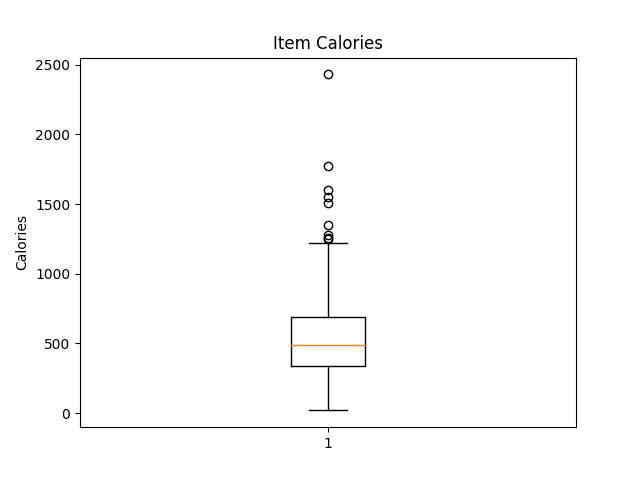

In [147]:
#looking at the calories of items
calorie_box = fast_food_bin_df['calories']

fig1, ax1 = plt.subplots()
ax1.set_title('Item Calories')
ax1.set_ylabel('Calories')
ax1.boxplot(calorie_box)
plt.show()

Calorie Quartiles and Potential Outliers

In [148]:
#look at the calorie quartiles and print

quartiles = calorie_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of calories is: {lowerq}")
print(f"The upper quartile of calories is: {upperq}")
print(f"The interquartile range of calories is: {iqr}")
print(f"The the median of calories is: {quartiles[0.5]} ")


#look at potential outliers and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of calories is: 335.0
The upper quartile of calories is: 690.0
The interquartile range of calories is: 355.0
The the median of calories is: 490.0 
Values below -197.5 could be outliers.
Values above 1222.5 could be outliers.


<IPython.core.display.Javascript object>


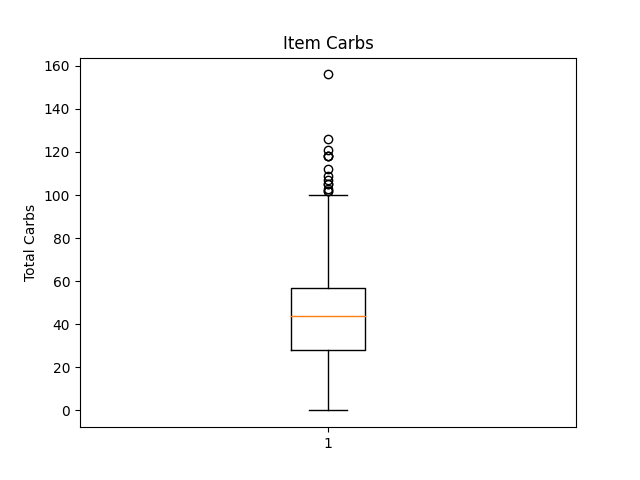

In [155]:
#look at the carbs of items

carb_box = fast_food_bin_df['total_carb']

fig1, ax1 = plt.subplots()
ax1.set_title('Item Carbs')
ax1.set_ylabel('Total Carbs')
ax1.boxplot(carb_box)
plt.show()

Carb Quartiles and Potential Outliers

In [150]:
#look at the carb quartiles and print

quartiles = carb_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of carbs is: {lowerq}")
print(f"The upper quartile of carbs is: {upperq}")
print(f"The interquartile range of carbs is: {iqr}")
print(f"The the median of carbs is: {quartiles[0.5]} ")


#look at potential outliers and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of carbs is: 28.0
The upper quartile of carbs is: 57.0
The interquartile range of carbs is: 29.0
The the median of carbs is: 44.0 
Values below -15.5 could be outliers.
Values above 100.5 could be outliers.
